In [1]:
import os

import numpy as np

In [2]:
dpath = "/lus/eagle/projects/datascience/regele/polaris/multi-objective-hpo/metric_data"
dataset = "fashion_mnist"
section = "valid_set.pkl.gz"
data_path = os.path.join(dpath, dataset, section)
print(data_path)

/lus/eagle/projects/datascience/regele/polaris/multi-objective-hpo/metric_data/fashion_mnist/valid_set.pkl.gz


In [3]:
import gzip

with gzip.GzipFile(data_path, "rb") as f:
    data = np.load(f, allow_pickle=True)

In [4]:
data

features                                                            \
         Activation LearningRate    N  Op1  Op2  Op3  Op4  Op5  Op6 Optimizer   
0         Hardswish     0.041550  3.0  0.0  3.0  3.0  2.0  4.0  2.0       SGD   
1         Hardswish     0.041550  3.0  0.0  3.0  3.0  2.0  4.0  2.0       SGD   
2         Hardswish     0.041550  3.0  0.0  3.0  3.0  2.0  4.0  2.0       SGD   
3         Hardswish     0.041550  3.0  0.0  3.0  3.0  2.0  4.0  2.0       SGD   
4         Hardswish     0.041550  3.0  0.0  3.0  3.0  2.0  4.0  2.0       SGD   
...             ...          ...  ...  ...  ...  ...  ...  ...  ...       ...   
42678918       ReLU     0.001819  3.0  4.0  4.0  0.0  3.0  2.0  2.0       SGD   
42678919       ReLU     0.001819  3.0  4.0  4.0  0.0  3.0  2.0  2.0       SGD   
42678920       ReLU     0.001819  3.0  4.0  4.0  0.0  3.0  2.0  2.0       SGD   
42678921       ReLU     0.001819  3.0  4.0  4.0  0.0  3.0  2.0  2.0       SGD   
42678922       ReLU     0.001819  3.0  4.0  4.0  0.0  3.0  2.0  2.0       SGD   

          ...     labels                                                     \
          ... train-loss  valid-acc valid-data_load_duration valid-duration   
0         ...   0.928522  66.978836                 0.042582       0.365290   
1         ...   0.412046  80.634921                 0.042615       0.364214   
2         ...   0.354326  82.031746                 0.044219       0.363947   
3         ...   0.317675  83.031746                 0.043772       0.360970   
4         ...   0.300805  82.873016                 0.042602       0.360279   
...       ...        ...        ...                      ...            ...   
42678918  ...   0.218289  93.216931                 0.043488       0.767390   
42678919  ...   0.220051  93.126984                 0.043727       0.775342   
42678920  ...   0.220402  93.126984                 0.045066       0.769249   
42678921  ...   0.218701  93.132275                 0.043543       0.778069   
42678922  ...   0.216307  93.105820                 0.043425       0.781172   

                                           sampling_index                     \
         valid-forward_duration valid-loss    fidelity_ID model_ID model_idx   
0                      0.365274   0.971570              0        0        69   
1                      0.364199   0.531797              0        0        69   
2                      0.363932   0.509379              0        0        69   
3                      0.360955   0.480711              0        0        69   
4                      0.360265   0.450353              0        0        69   
...                         ...        ...            ...      ...       ...   
42678918               0.767372   0.192929             27   269146        93   
42678919               0.775323   0.193347             27   269146        93   
42678920               0.769231   0.193629             27   269146        93   
42678921               0.778051   0.194257             27   269146        93   
42678922               0.781154   0.193366             27   269146        93   

                 
         taskid  
0          1168  
1          1168  
2          1168  
3          1168  
4          1168  
...         ...  
42678918   1427  
42678919   1427  
42678920   1427  
42678921   1427  
42678922   1427  

[5908000 rows x 39 columns]

In [5]:
data.columns

MultiIndex([(      'features',               'Activation'),
            (      'features',             'LearningRate'),
            (      'features',                        'N'),
            (      'features',                      'Op1'),
            (      'features',                      'Op2'),
            (      'features',                      'Op3'),
            (      'features',                      'Op4'),
            (      'features',                      'Op5'),
            (      'features',                      'Op6'),
            (      'features',                'Optimizer'),
            (      'features',               'Resolution'),
            (      'features',           'TrivialAugment'),
            (      'features',                        'W'),
            (      'features',              'WeightDecay'),
            (      'features',                    'epoch'),
            (        'labels',                    'FLOPS'),
            (        'labels',          

In [49]:
objective_columns = ["valid-acc", "latency", "size_MB"]

# Fixed constants
fixed_fidelities = {
    "Optimizer": "SGD",
    "N": 5.0, # Depth Multiplier (value in {1, 3, 5})
    "W": 16.0, # Width Multiplier (value in {4, 8, 16})
    "Resolution": 1.0, # Resolution Multiplier (value in {0.25, 0.5, 1.0})
    # "epoch": 200,
}

In [50]:
selection = None
for k,v in fixed_fidelities.items():
    if selection is None:
        selection = data["features"][k] == v
    else:
        selection = selection & (data["features"][k] == v)

sdata = data[selection]
print(f"{len(sdata) / len(data) * 100} %")
sdata

1.2017603249830737 %


features                                                            \
        Activation LearningRate    N  Op1  Op2  Op3  Op4  Op5  Op6 Optimizer   
7644724       ReLU     0.445399  5.0  3.0  4.0  1.0  0.0  4.0  1.0       SGD   
7644725       ReLU     0.445399  5.0  3.0  4.0  1.0  0.0  4.0  1.0       SGD   
7644726       ReLU     0.445399  5.0  3.0  4.0  1.0  0.0  4.0  1.0       SGD   
7644727       ReLU     0.445399  5.0  3.0  4.0  1.0  0.0  4.0  1.0       SGD   
7644728       ReLU     0.445399  5.0  3.0  4.0  1.0  0.0  4.0  1.0       SGD   
...            ...          ...  ...  ...  ...  ...  ...  ...  ...       ...   
8924767  Hardswish     0.017102  5.0  0.0  2.0  3.0  0.0  2.0  4.0       SGD   
8924768  Hardswish     0.017102  5.0  0.0  2.0  3.0  0.0  2.0  4.0       SGD   
8924769  Hardswish     0.017102  5.0  0.0  2.0  3.0  0.0  2.0  4.0       SGD   
8924770  Hardswish     0.017102  5.0  0.0  2.0  3.0  0.0  2.0  4.0       SGD   
8924771  Hardswish     0.017102  5.0  0.0  2.0  3.0  0.0  2.0  4.0       SGD   

         ...     labels                                                     \
         ... train-loss  valid-acc valid-data_load_duration valid-duration   
7644724  ...   1.207513  26.724868                 0.044834       1.949792   
7644725  ...   0.741152  35.899471                 0.046420       1.976739   
7644726  ...   0.670929  28.746032                 0.044507       1.967837   
7644727  ...   0.792853  65.518519                 0.046175       1.975394   
7644728  ...   0.650046  25.788360                 0.044295       2.006920   
...      ...        ...        ...                      ...            ...   
8924767  ...   0.078561  94.793651                 0.041435       1.509551   
8924768  ...   0.077570  94.835979                 0.040510       1.511526   
8924769  ...   0.075401  94.783069                 0.040377       1.488605   
8924770  ...   0.078073  94.830688                 0.041093       1.497100   
8924771  ...   0.078591  94.793651                 0.040239       1.486151   

                                          sampling_index                     \
        valid-forward_duration valid-loss    fidelity_ID model_ID model_idx   
7644724               1.949774   1.893258              4    39991         2   
7644725               1.976721   1.883048              4    39991         2   
7644726               1.967819   1.915149              4    39991         2   
7644727               1.975376   0.987903              4    39991         2   
7644728               2.006901   2.322520              4    39991         2   
...                        ...        ...            ...      ...       ...   
8924767               1.509537   0.177364              5    49561        48   
8924768               1.511512   0.178813              5    49561        48   
8924769               1.488591   0.178182              5    49561        48   
8924770               1.497086   0.178493              5    49561        48   
8924771               1.486137   0.177373              5    49561        48   

                
        taskid  
7644724   2656  
7644725   2656  
7644726   2656  
7644727   2656  
7644728   2656  
...        ...  
8924767   2601  
8924768   2601  
8924769   2601  
8924770   2601  
8924771   2601  

[71000 rows x 39 columns]

In [51]:
objs = sdata["labels"][objective_columns].values
objs[:,0] = 100 - objs[:,0] # Accuracy becomes Error Rate

In [52]:
from deephyper.skopt.moo import non_dominated_set

pf_mask = non_dominated_set(objs)

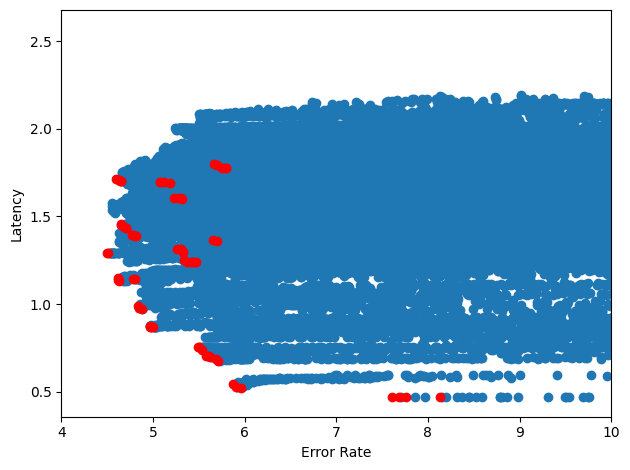

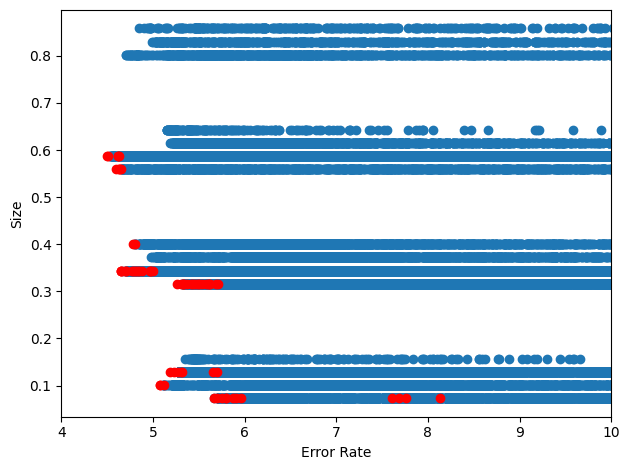

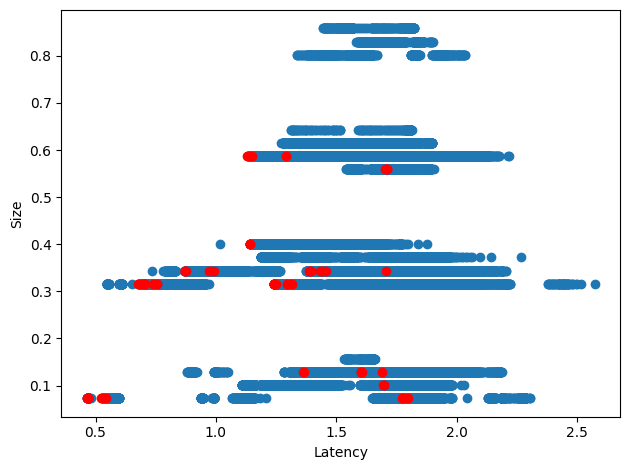

In [53]:
import matplotlib.pyplot as plt

labels = ["Error Rate", "Latency", "Size"]
idx = [(0, 1), (0, 2), (1, 2)]

for i, j in idx:
    plt.figure()
    plt.scatter(objs[~pf_mask][:, i], objs[~pf_mask][:, j])
    plt.scatter(objs[pf_mask][:, i], objs[pf_mask][:, j], color="red")
    plt.xlabel(labels[i])
    plt.ylabel(labels[j])

    if i == 0:
        plt.xlim(4, 10)
    plt.tight_layout()
    plt.show()

In [14]:
import deephyper_benchmark as dhb

dhb.load("JAHSBench")


<module 'deephyper_benchmark.lib.jahsbench' from '/lus/grand/projects/datascience/regele/polaris/deephyper-scalable-bo/build/deephyper-benchmark/lib/JAHSBench/__init__.py'>

In [15]:
from deephyper_benchmark.lib.jahsbench import hpo

2023-08-11 09:09:15.793635: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-11 09:09:32.471349: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.8'; dlerror: libnvinfer.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/nvidia/hpc_sdk/Linux_x86_64/21.9/comm_libs/nvshmeme/lib:/opt/nvidia/hpc_sdk/Linux_x86_64/21.9/comm_libs/nccl/lib:/opt/nvidia/hpc_sdk/Linux_x86_64/21.9/math_libs/lib64:/opt/nvidia/hpc_sdk/Linux_x86_64/21.9/compilers/lib:/opt/nvidia/hpc_sdk/Linux_x86_64/21.9/compilersextras/qd/lib:/opt/nvidia/hpc_sdk/Linux_x86_64/21.9/cudaextras/CUPTI/lib64:/opt/nvidia/hpc_sdk/Linux_x86_64/21.9/cuda/lib64:/opt/cray/pe/papi/6.0.0.14/lib64:/opt/cray/libfabric/1.11.0.4.125/lib64:/dbhome/db2cat/sqllib/lib64:/dbhome/db2cat/sqllib/lib64/gskit:/dbhome/db2cat/sqllib/lib

In [16]:
from deephyper.evaluator import RunningJob

In [54]:
# Indexes of PF configurations
idx_pf = np.where(pf_mask)[0]

objs_sim = []
for i in idx_pf:
# for i in range(len(sdata)):
    # Create hyperparameter configuration
    config = sdata.iloc[i]["features"].to_dict()
    config["TrivialAugment"] = "on" if config["TrivialAugment"] else "off"

    # Create job to infer the black-box (i.e., surrogate model)
    rjob = RunningJob(id=0, parameters=config)
    results = hpo.run(rjob)
    objs_i= results["objective"]

    # Normalize to minimization
    objs_i[0] = 100 - objs_i[0]
    objs_i[1] = - objs_i[1]
    objs_i[2] = - objs_i[2]

    objs_sim.append(objs_i)

objs_sim = np.array(objs_sim)

In [55]:
print(np.shape(objs[pf_mask]))
print(np.shape(objs_sim))

(74, 3)
(74, 3)


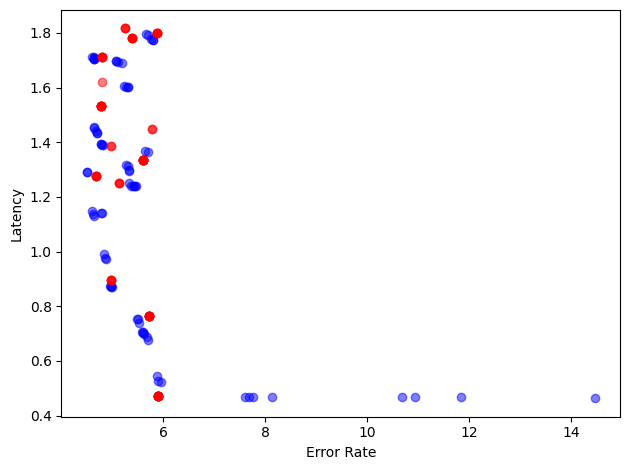

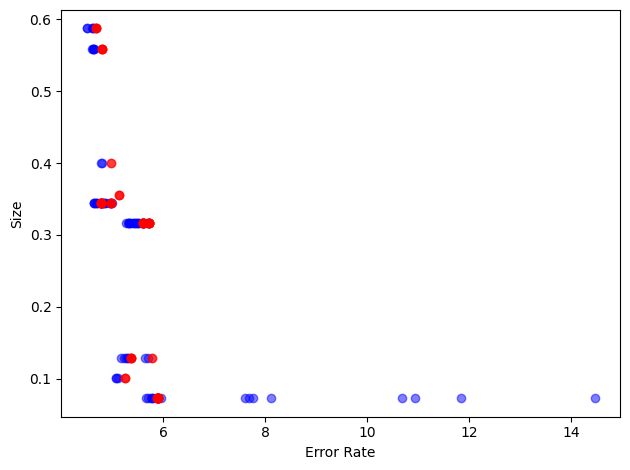

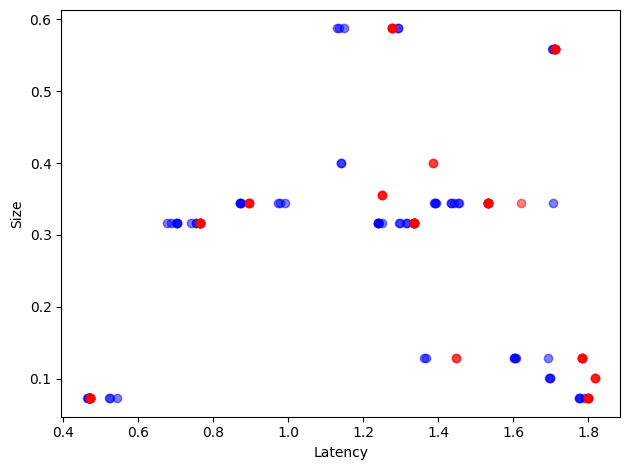

In [56]:
labels = ["Error Rate", "Latency", "Size"]
idx = [(0, 1), (0, 2), (1, 2)]

for i, j in idx:
    plt.figure()
    # plt.scatter(objs[:, i], objs[:, j], alpha=0.5, color="blue")
    plt.scatter(objs[pf_mask][:, i], objs[pf_mask][:, j], alpha=0.5, color="blue")
    plt.scatter(objs_sim[:, i], objs_sim[:, j], alpha=0.5, color="red")
    plt.xlabel(labels[i])
    plt.ylabel(labels[j])
    plt.tight_layout()
    plt.show()

In [58]:
from sklearn.metrics import r2_score

for i in range(3):
    r2 = r2_score(objs[pf_mask][i], objs_sim[i])
    # r2 = r2_score(objs[i], objs_sim[i])
    print(f"{labels[i]} - r2: {r2}")

Error Rate - r2: 0.9982482752193474
Latency - r2: 0.9983969296461987
Size - r2: 0.9983669362231437
